In [1]:
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
import re
# from scipy.spatial import distance_matrix

plt.rcParams['figure.dpi'] = 150

In [2]:
purples = ["#0a0612", "#392249", "#482980", "#673ab7",
           "#7a52aa", "#9779bd", "#b59fd0", "#d3c5e3"]

In [3]:
from util import *

In [4]:
X,vocab = load_data('data/cnnhealth.txt')

Importing data...
X has 4061 examples and 9609 features in BOW format...


In [5]:
# generate_statistics(X,vocab)

Dataset Statistics:
# Number of Tweets: 4061
# Number of Words (Total): 32612
# Number of Tokens: 9609
# Average Number of Words per Tweet: 8.031
# Top 10 Legal Tokens: ['health' 'getfit' 'new' '@cnnhealth' "today's" 'cancer' 'know' 'kids'
 '@drsanjaygupta' 'ebola']


In [5]:
# distance_matrix_1, distance_matrix_2 = create_distance_matrices(X)
# save_distance_matrices(distance_matrix_1, distance_matrix_2, save_type='npy')

done with distance metric 1!365
done with distance metric 2!365


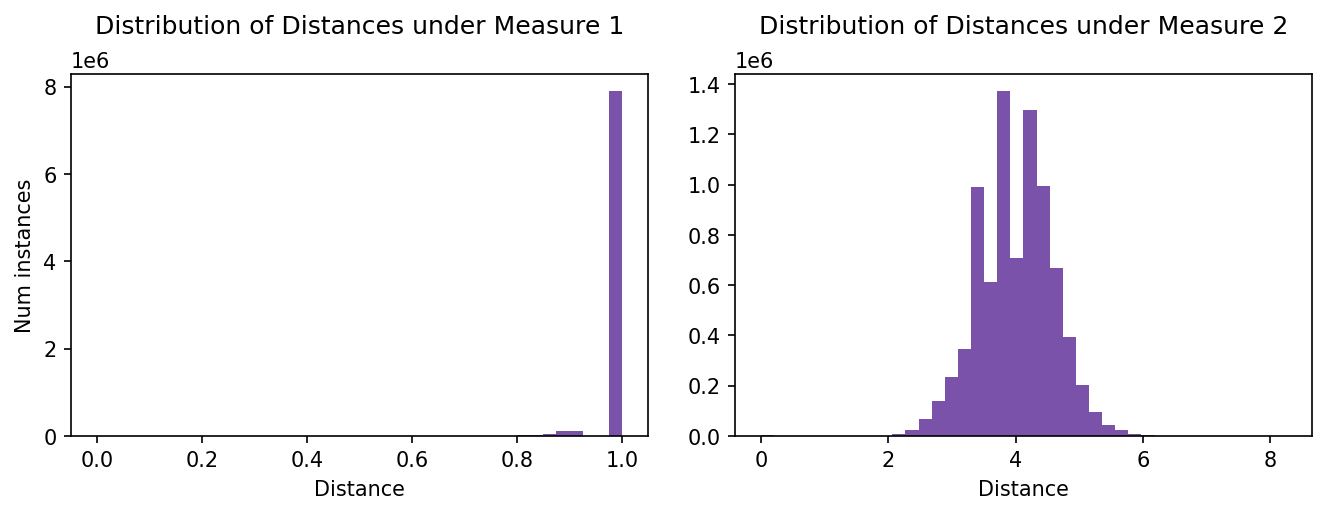

In [9]:
# plt.rcParams['figure.dpi'] = 150
# plot_distance_distributions(distance_matrix_1, distance_matrix_2)

In [7]:
def SSE(X, cluster_labels):
    '''
    Within-cluster sum of squares error
    '''
    m,n = np.shape(X)
    k = np.max(cluster_labels)

    clusters = np.arange(k+1, dtype=int)
    means = np.zeros(((k+1), n))
    # find mean for each cluster
    for cluster in clusters:
        if X[cluster_labels==cluster].size != 0:
            means[cluster] = np.average(X[cluster_labels==cluster], axis=0)
        else:
            pass #stays as zeros
    # iterate through examples and find squared distance from cluster means
    sum_error = 0.0
    for x, label in zip(X, cluster_labels):
        sum_error += np.sum(np.square(x-means[label]))
    return sum_error

In [24]:
def BSS(X, cluster_labels):
    '''
    Between-cluster sum of squares error
    '''
    cluster_labels = np.array(cluster_labels)
    k = np.max(cluster_labels)

    clusters = np.arange(k+1, dtype=int)
    total_sample_mean = np.average(X, axis=0)
    
    sum_error = 0.0
    for cluster in clusters:
        if X[cluster_labels==cluster].size != 0:
            cluster_mean = np.average(X[cluster_labels==cluster], axis=0)
            cluster_size = np.sum((cluster_labels==cluster))
        else:
            cluster_mean = 0.0
            cluster_size = 0.0
        sum_error += cluster_size*np.sum(np.square(cluster_mean-total_sample_mean))
    
    return sum_error

In [30]:
X = np.array([[0,1,2],[0,1,2],[0,1,4]])
cluster_labels = [0,2,1]

In [31]:
BSS(X, cluster_labels)

2.6666666666666665

In [18]:
X[1==0].size

0

In [21]:
a = np.array([1,2,3,4,5])
b = np.array([1,2,6,6,6])

In [23]:
np.sum((a==1))

1

In [32]:
def print_cluster_topics(X, vocab, cluster_labels):
    cluster_labels = np.array(cluster_labels)
    k = np.max(cluster_labels)

    clusters = set(list(cluster_labels))
    cluster_sizes = []
    for cluster in clusters:
        cluster_size = np.sum((cluster_labels==cluster))
        cluster_sizes.append(cluster_size)

    cluster_sizes, clusters = (list(t) for t in zip(*sorted(zip(cluster_sizes, clusters), reverse=True)))
    for i in range(np.min(int(k),8)):
        print("Cluster {}:".format(clusters[i]))
        print("{}".format(vocab[np.flip(np.argsort(np.sum(X[cluster_labels==clusters[i]], axis=0)))[0:10]]))

In [ ]:
def visualize_clustering(D, cluster_labels):
    # sort D by clusters
    k = np.max(cluster_labels)
    clusters = np.arange(k+1, dtype=int)
    sorted_D = None
    for cluster in clusters:
        if np.sum((cluster_labels==cluster)) == 0: # no members in cluster
            pass
        elif sorted_D is None: # stacking process has not yet begun
            sorted_D = D[cluster_labels==cluster]
        else: # normal stack
            sorted_D = np.vstack((sorted_D, D[cluster_labels==cluster]))
    plt.figure(figsize=(5,5), dpi=100)
    plt.imshow(sorted_D)
    plt.ylabel('# of clusters')
    plt.xlabel('size of cluster')
    plt.show();

In [33]:
f = np.array([[1,2,3],[4,5,6]])

In [37]:
X = np.random.uniform(0,1,(100,100))

In [38]:
from scipy.ndimage.filters import gaussian_filter

/var/folders/76/fwbywfj159x2s03lvczby1380000gn/T/ipykernel_53653/2664825262.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


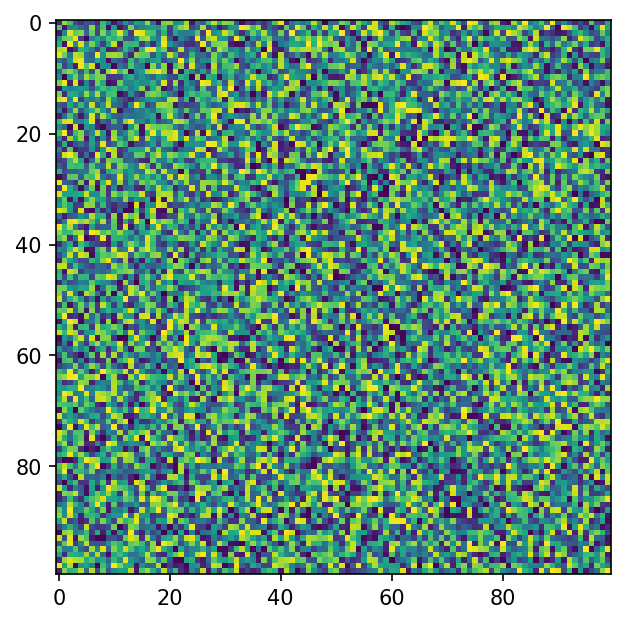

In [39]:
plt.imshow(X)